<a href="https://colab.research.google.com/github/Abhiprameesh/Satellite-Image-Classification-CNN-model/blob/main/CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[INFO] Loading data...
[INFO] Building model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[INFO] Training model...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.6315 - loss: 0.9778 - val_accuracy: 0.3417 - val_loss: 1.4557
Epoch 2/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.7914 - loss: 0.5072 - val_accuracy: 0.3375 - val_loss: 1.3689
Epoch 3/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.8522 - loss: 0.3968 - val_accuracy: 0.5875 - val_loss: 1.2010
Epoch 4/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.8662 - loss: 0.3757 - val_accuracy: 0.5458 - val_loss: 1.3299
Epoch 5/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.8691 - loss: 0.3286 - val_accuracy: 0.6292 - val_loss: 1.0721
Epoch 6/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9049 - loss: 0.2430 - val_accuracy: 0.7500 - val_loss: 0.6039
Epoch 7/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.9049 - loss: 0.2632 - val_accuracy: 0.7875 - val_loss: 0.6625
Epoch 8/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.9100 - loss: 0.2191 - val_accuracy: 0.9417 - v

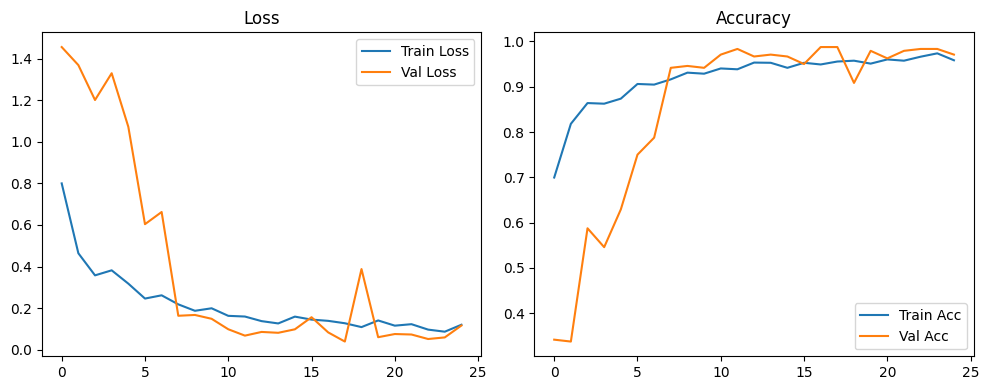

[INFO] Evaluating model...
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 278ms/step - accuracy: 0.9642 - loss: 0.1385
Validation Accuracy: 97.08%
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 303ms/step



Classification Report:
              precision    recall  f1-score   support

       cloud       1.00      0.96      0.98        70
        land       1.00      0.95      0.98        88
       water       0.92      1.00      0.96        82

    accuracy                           0.97       240
   macro avg       0.97      0.97      0.97       240
weighted avg       0.97      0.97      0.97       240

Confusion Matrix:
[[67  0  3]
 [ 0 84  4]
 [ 0  0 82]]
[INFO] Model and history saved.


In [1]:
# ==============================
# Satellite Image Classification (Cloud / Land / Water)
# ==============================

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ==============================
# Config
# ==============================
IMG_SIZE = 128
CLASSES = ['cloud', 'land', 'water']   # updated classes
DATASET_PATH = "/content/drive/MyDrive/dataset"
# ==============================
# 1. Load Data
# ==============================
def load_data(dataset_path, img_size=128):
    X, Y = [], []
    for idx, cls in enumerate(CLASSES):
        folder_path = os.path.join(dataset_path, cls)
        label = [0] * len(CLASSES)
        label[idx] = 1.0
        for file in os.listdir(folder_path):
            if not file.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue
            img_path = os.path.join(folder_path, file)
            try:
                img = cv2.imread(img_path)
                img = cv2.resize(img, (img_size, img_size))
                img = img / 255.0
                X.append(img)
                Y.append(label)
            except:
                print(f"Error loading: {img_path}")
                continue
    return np.array(X), np.array(Y)

print("[INFO] Loading data...")
X, Y = load_data(DATASET_PATH, IMG_SIZE)

# ==============================
# 2. Train-Test Split
# ==============================
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=42)

# ==============================
# 3. Build CNN Model
# ==============================
def build_model(input_shape=(IMG_SIZE, IMG_SIZE, 3)):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),

        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(len(CLASSES), activation='softmax')
    ])
    return model

print("[INFO] Building model...")
model = build_model()
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# ==============================
# 4. Data Augmentation
# ==============================
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

# ==============================
# 5. Train Model
# ==============================
print("[INFO] Training model...")
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    validation_data=(X_val, Y_val),
    epochs=25
)

# ==============================
# 6. Plot Training History
# ==============================
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# ==============================
# 7. Evaluation
# ==============================
print("[INFO] Evaluating model...")
val_loss, val_accuracy = model.evaluate(X_val, Y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Classification report
Y_pred = model.predict(X_val)
y_true = np.argmax(Y_val, axis=1)
y_pred = np.argmax(Y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=CLASSES))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# ==============================
# 8. Save Model + History
# ==============================
model.save("satellite_model.h5")
with open("history.pkl", "wb") as f:
    pickle.dump(history.history, f)

print("[INFO] Model and history saved.")


In [5]:
from tensorflow.keras.models import load_model

# Load the saved model
model_path = "satellite_model.h5"  # Make sure this path is correct
loaded_model = load_model(model_path)

print("Model loaded successfully!")

Model loaded successfully!


Now we can use the loaded image data (`img_cv2`) and the loaded model (`loaded_model`) with a prediction function.

Next, load the trained model.

In [13]:
from google.colab import files
import io
from PIL import Image
import numpy as np
import cv2

uploaded = files.upload()

# Assuming you upload only one file
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  img_name = fn
  img_bytes = uploaded[fn]

# Load the image using PIL and convert to numpy array
img_pil = Image.open(io.BytesIO(img_bytes))
img_np = np.array(img_pil)

# Convert from RGB to BGR if needed (OpenCV uses BGR)
if img_np.shape[-1] == 3:
    img_cv2 = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)
else:
    img_cv2 = img_np # Assuming it's already in a compatible format

print(f"Image '{img_name}' loaded successfully!")

Saving cloud_449_jpg.rf.f04c48fed567e08e06a54a0dedcadce2.jpg to cloud_449_jpg.rf.f04c48fed567e08e06a54a0dedcadce2.jpg
User uploaded file "cloud_449_jpg.rf.f04c48fed567e08e06a54a0dedcadce2.jpg" with length 27166 bytes
Image 'cloud_449_jpg.rf.f04c48fed567e08e06a54a0dedcadce2.jpg' loaded successfully!


In [14]:
# Make sure you have already executed the cell that defines predict_image_class_from_data
# and loaded the model (loaded_model)

IMG_SIZE = 128 # Use the same image size as during training
CLASSES = ['cloud', 'land', 'water'] # Use the same class names as during training

def predict_image_class_from_data(image_data, model, img_size, classes):
    """
    Preprocesses image data and makes a prediction using the model.

    Args:
        image_data (numpy.ndarray): The image data as a numpy array.
        model (tensorflow.keras.models.Model): The trained model.
        img_size (int): The size to resize the image to.
        classes (list): A list of class names.

    Returns:
        tuple: A tuple containing the predicted class name and the prediction probabilities.
    """
    try:
        img = cv2.resize(image_data, (img_size, img_size))
        img = img / 255.0  # Normalize the image
        img = np.expand_dims(img, axis=0)  # Add batch dimension

        predictions = model.predict(img)
        predicted_class_index = np.argmax(predictions)
        predicted_class_name = classes[predicted_class_index]

        return predicted_class_name, predictions[0]

    except Exception as e:
        print(f"An error occurred during prediction: {e}")
        return None, None

# Use the new function with the uploaded image data
predicted_class, probabilities = predict_image_class_from_data(img_cv2, loaded_model, IMG_SIZE, CLASSES)

if predicted_class:
    print(f"The predicted class for the uploaded image is: {predicted_class}")
    print("Prediction probabilities:")
    for i, class_name in enumerate(CLASSES):
        print(f"  {class_name}: {probabilities[i]*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
The predicted class for the uploaded image is: cloud
Prediction probabilities:
  cloud: 100.00%
  land: 0.00%
  water: 0.00%
